# Can we predict benign or malignancy of tumors? 
#Breast cancer prediction


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("data.csv")
print(data.dtypes)
print(data.head())
print(data.shape)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
data_set = data.drop(['Unnamed: 32'], axis =1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac1d050>,
      dtype=object)

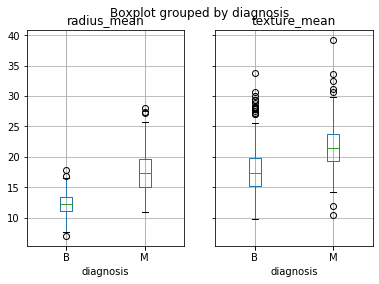

In [7]:
data_set.boxplot(column=['radius_mean','texture_mean'], by = 'diagnosis')

# There are many outliers in texture of mass compare to the mean radius of mass. The size of mass (radius_mean) will be better criteria for malignancy diagnosis compare to the texture of mass. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9d6a10>,
      dtype=object)

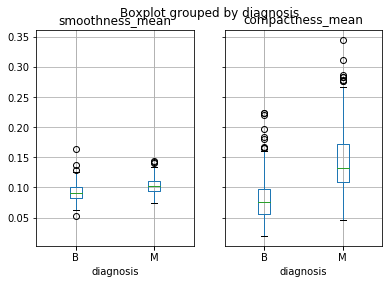

In [8]:
data_set.boxplot(column=['smoothness_mean','compactness_mean'], by = 'diagnosis')

# There is not much difference in smoothness of mass between groups. The compactness is higher in malignancy group.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bbaf5d0>,
      dtype=object)

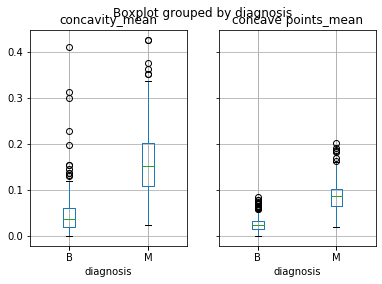

In [9]:
data_set.boxplot(column=['concavity_mean','concave points_mean'], by = 'diagnosis')

# There are many outliers in concavity feature. Concave point is higher in malignancy group.

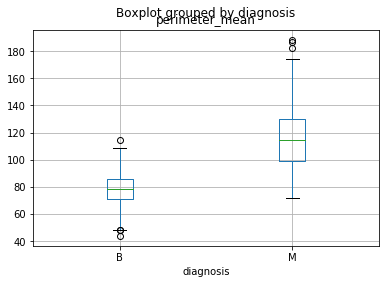

In [44]:
data_set.boxplot(column=['perimeter_mean'], by = 'diagnosis')

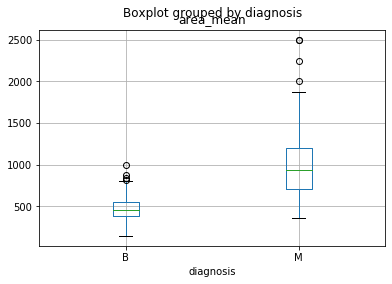

In [46]:
data_set.boxplot(column=['area_mean'], by = 'diagnosis')

#  The perimeter and the area of mass are higher in malignancy group.

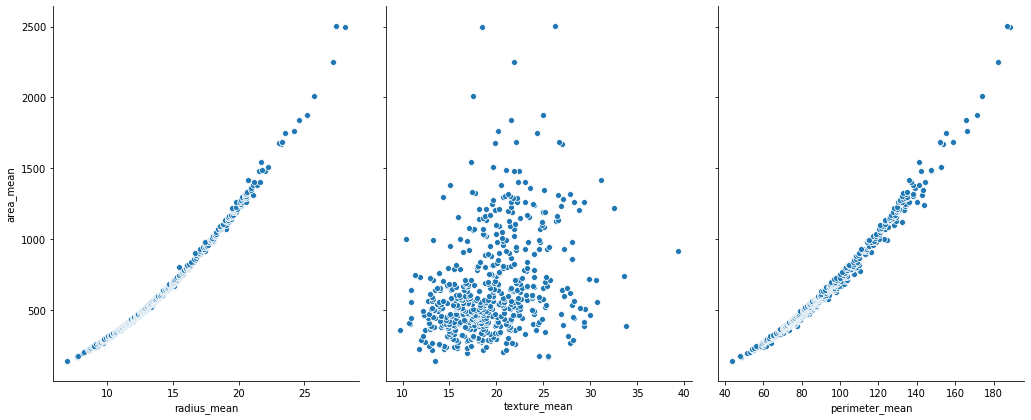

In [47]:
sns.pairplot(data_set, x_vars =['radius_mean','texture_mean','perimeter_mean'], y_vars ='area_mean', height =6, aspect=0.8);

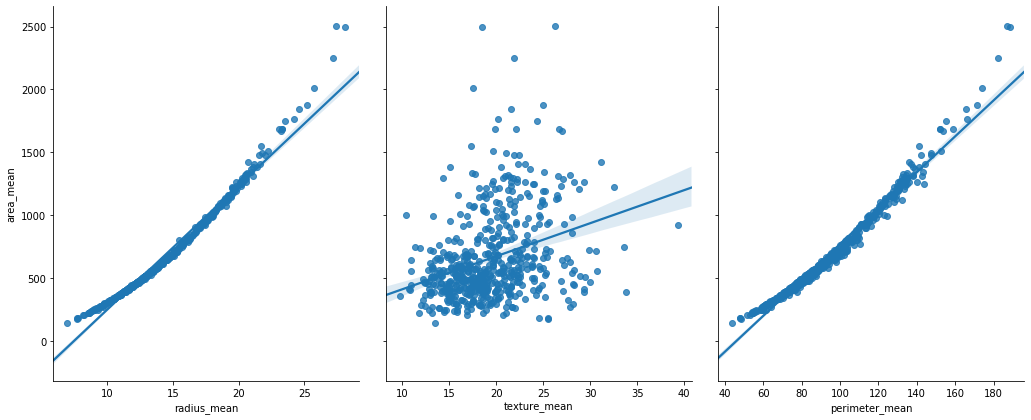

In [48]:
sns.pairplot(data_set, x_vars =['radius_mean','texture_mean','perimeter_mean'], y_vars ='area_mean', height =6, aspect=0.8, kind ='reg')

# area_mean feature is highly correlated with radius_mean and perimeter_mean compared to texture_mean

# The overview of correlation chart in data_set

In [49]:
auto_correlations = data_set.corr()
auto_correlations

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_number,diagnosis_pred_class
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769,0.077456
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029,0.827781
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185,0.298718
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636,0.826247
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984,0.830542
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560,0.167137
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534,0.433323
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360,0.584516
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614,0.708356
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499,0.186271


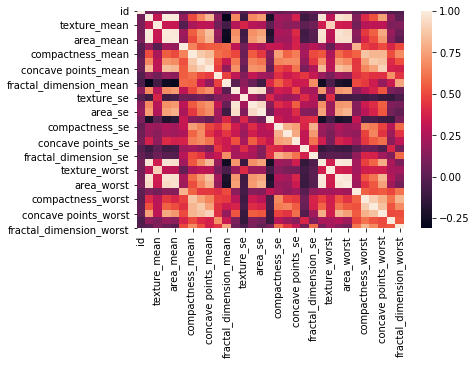

In [16]:
sns.heatmap(auto_correlations)

# Estimate the model coefficients for this data : the `area_mean`  as our single feature to predict `area_worst`

In [50]:
feature_cols = ['area_mean']
X = data[feature_cols]
y = data.area_worst


In [51]:
area_linreg = LinearRegression()
area_linreg.fit(X, y)

print("The y intercept:", area_linreg.intercept_)
print("The single coefficient:", area_linreg.coef_)

The y intercept: -135.7379269068473
The single coefficient: [1.55189795]


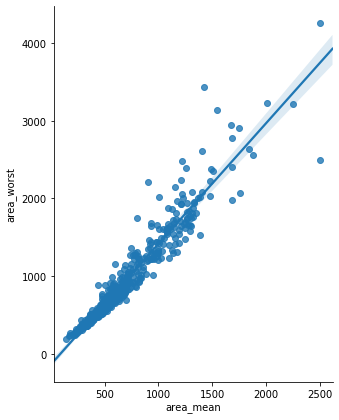

In [52]:
sns.pairplot(data, x_vars=['area_mean'], y_vars = 'area_worst', height=6,aspect =0.8, kind='reg')

# strong correlations between 'area_mean' and 'area_worst'

## pearson correlation analysis between area_mean and area_worst

In [53]:
X = data_set.area_mean
Y = data_set.area_worst

In [54]:
def pearson_r(X, Y):
    corr_mat=np.corrcoef(X,Y)
    return corr_mat[0,1]
r_obs = pearson_r(X,Y)
print('observed significance value=', r_obs)

observed significance value= 0.9592133256498999


## Model for prediction: predict 'area_worst' using 'area_mean' value

In [55]:
#predict for a new area_worst, here where the area_mean is 1000
area_linreg.predict([[1000]])

array([1416.16001959])

# How well does this model fit the data? 

R^2: 0.9200902041043412


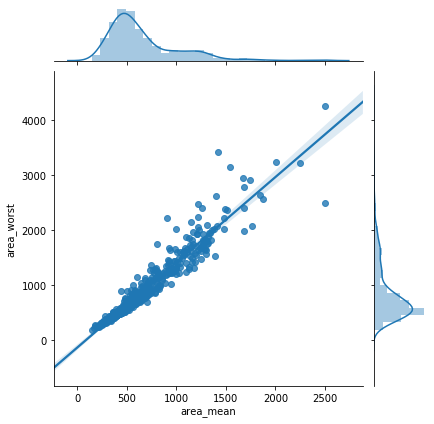

In [25]:
sns.jointplot('area_mean','area_worst', data_set, kind='reg')
print("R^2:", stats.pearsonr(X.values.flatten(), y.values)[0]**2)

# Converting categorical target (diagnosis) into a number

In [56]:
data_set.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [57]:
data_set["diagnosis_number"] = (data_set.diagnosis=='M').astype(int)
data_set.diagnosis_number.value_counts()

0    357
1    212
Name: diagnosis_number, dtype: int64

# plot 'area_mean' relative to this new numeric 'diagnosis_number'.

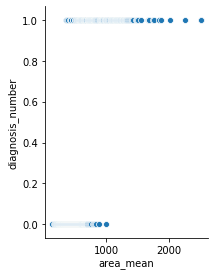

In [59]:
sns.pairplot(data_set, x_vars=["area_mean"], y_vars="diagnosis_number", height =4, aspect =0.8)

In [60]:
#fit a linear regression model and store the prediction

feature =['area_mean']
X = data_set[feature]
y = data_set.diagnosis_number
linreg =LinearRegression()
linreg.fit(X,y)
diagnosis_pred = linreg.predict(X)

In [61]:
# transform predictions to 1 or 0
diagnosis_pred_class = np.where(diagnosis_pred >= 0.5, 1, 0)
diagnosis_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
data_set['diagnosis_pred_class'] = diagnosis_pred_class
data_set.sort_values('area_mean', inplace=True)

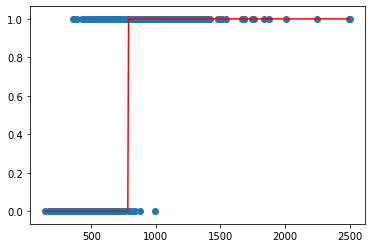

In [63]:
sns.mpl.pyplot.scatter(data_set.area_mean, data_set.diagnosis_number)
sns.mpl.pyplot.plot(data_set.area_mean,data_set.diagnosis_pred_class, color='red')

In [34]:
diagnosis_pred[:10]

array([0.71001577, 1.02686651, 0.90695069, 0.11053417, 0.99859368,
       0.19925237, 0.74803786, 0.29752485, 0.24088169, 0.19808246])

# Estimate the model coefficients : `texture_worst`  as our single feature to predict 'malignancy' with Logistic regression on categorical variables

In [64]:
logreg = LogisticRegression(C=1e9 ,solver='lbfgs')  # why le9?
feature_cols = ['texture_worst']
X = data_set[feature_cols]
y = data_set.diagnosis_number
logreg.fit(X,y)
diagnosis_pred_class_log = logreg.predict(X)

 

In [65]:
diagnosis_pred_class_log

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [66]:
# plotting predicted probabilities, and the 50% line

In [67]:

outcome_probs = logreg.predict_proba(X)[:, 1]


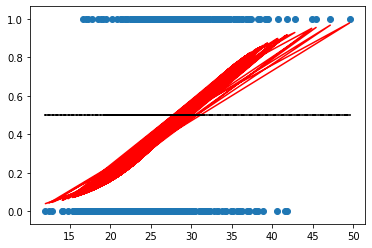

In [68]:
sns.mpl.pyplot.scatter(data_set.texture_worst,data_set.diagnosis_number)
sns.mpl.pyplot.plot(data_set.texture_worst,outcome_probs, color ='red')
sns.mpl.pyplot.plot(data_set.texture_worst,np.ones(outcome_probs.shape)*.5,'k--')

In [69]:
# probability calculations
print("Texture worst of 40:", logreg.predict_proba([[40]]))

Texture worst of 40: [[0.11363567 0.88636433]]


In [70]:
diagnosis_pred_class_log[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [71]:
outcome_pred_class = np.where (diagnosis_pred_class_log >=0.5, 1,0)
outcome_pred_class

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [72]:
#accuracy of model score
y = data_set.diagnosis_number
y_pred = outcome_pred_class
print("Model accuracy:", metrics.accuracy_score(y,y_pred))

Model accuracy: 0.7205623901581723
